In [7]:
%matplotlib inline
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute, Aer
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import signal

backend = Aer.get_backend('statevector_simulator')

def gauss_vector2(n,d=12,center=0.5):
    count = 2**n
    diff_center = (center - 0.5)*count
#     print("Diff center:",diff_center)
    g = signal.gaussian(2**n, (2**n)/d)
    g = g/np.sum(g)
    tmp = np.sqrt(g)
    if diff_center==0:
        ret = tmp
    else:
        ret = tmp.copy()
        n_len = len(tmp)
        for i in range(0,n_len):
            idx = int ( (i+diff_center+n_len)%n_len )
            ret[idx]=tmp[i]
        
    return ret
def get_sv_diff(sv1, sv2):
    diff = 0
    for i in range(0,len(sv1)):
        diff += math.pow(abs(sv1[i]-sv2[i]),2)
    diff = math.sqrt(diff)/len(sv1)
    return diff

def analyze_qasm(qubits_count, qasm, d=12, center=0.5):
    N = qubits_count
    input_vector = gauss_vector2(N, d, center)
    input_dist = np.power(np.abs(input_vector), 2)
    qc = QuantumCircuit.from_qasm_str(qasm)


    job = execute(qc, backend=backend)
    job_result = job.result()

    output_vector = job_result.get_statevector(qc)
    output_dist = np.abs(output_vector)**2

#     diff = get_sv_diff(input_vector, output_vector)
#     print("\nReturned circuit:\n")
#     print(qc.qasm())

#     print("\nExpected state vector:\n")
#     print(repr(input_vector))

#     print("\nReal state vector:\n")
#     print(repr(output_vector))

#     print("\nInput distribution:\n")
#     print(repr(input_dist))

#     print("\nOutput distribution:\n")
#     print(repr(output_dist))

    plt.figure(figsize=(15, 6))
    plt.plot(range(len(input_dist)), input_dist)
    plt.plot(range(len(output_dist)), output_dist)
    plt.show()
#     print("\nSV diff (L2norm/svcount):",diff)
    print("\nL1 distance:", np.sum(np.abs(input_dist-output_dist)))


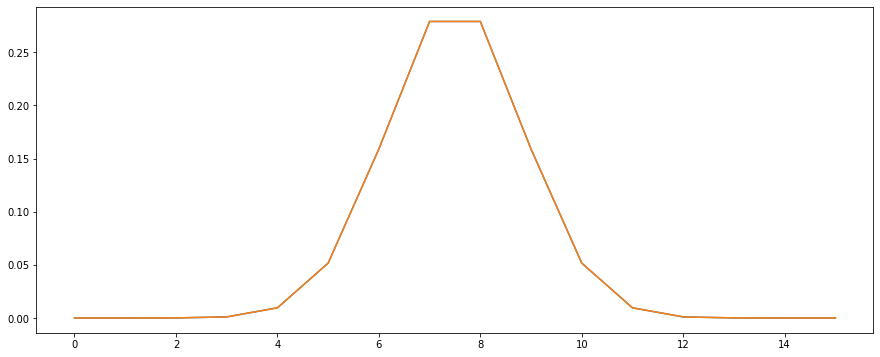


L1 distance: 4.8882832059616964e-05


In [8]:
qasm4 = """
OPENQASM 2.0;
include "qelib1.inc";
qreg q[4];
ry (-0.089775636792183) q[0];
ry (-2.086135387420654) q[1];
ry (3.119444847106934) q[2];
ry (1.570797920227051) q[3];
cx q[0], q[1];
ry (0.672237932682037) q[1];
cx q[0], q[2];
ry (-2.441549539566040) q[0];
cx q[1], q[0];
ry (2.806121110916138) q[0];
cx q[3], q[2];
cx q[2], q[0];
cx q[0], q[1];
"""
analyze_qasm(4, qasm4, 12, 0.5)

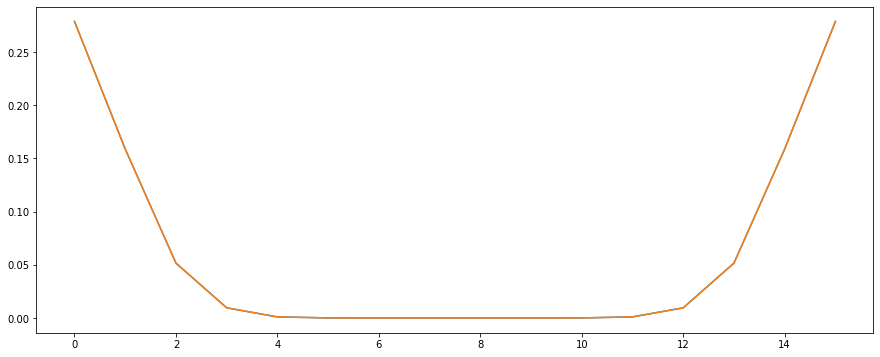


L1 distance: 4.015501748583778e-05


In [9]:
qasm4_shifted_to_0 = """
OPENQASM 2.0;
include "qelib1.inc";
qreg q[4];
ry (-0.089777357876301) q[0];
ry (-1.055350184440613) q[1];
ry (0.022185102105141) q[2];
ry (1.570808410644531) q[3];
cx q[0], q[1];
ry (2.469332218170166) q[1];
cx q[0], q[2];
ry (0.700042009353638) q[0];
cx q[1], q[0];
ry (-0.335475951433182) q[0];
cx q[3], q[2];
cx q[2], q[0];
cx q[0], q[1];
"""
analyze_qasm(4, qasm4_shifted_to_0, 12, 0)

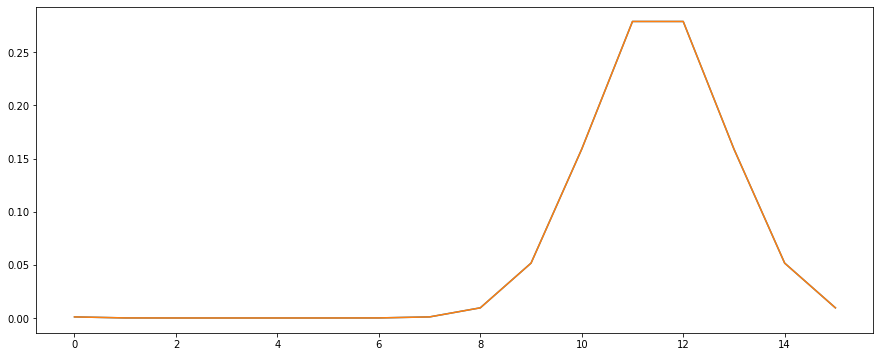


L1 distance: 3.623080982421483e-05


In [10]:
qasm4_shifted_to_08 = """
OPENQASM 2.0;
include "qelib1.inc";
qreg q[4];
ry (3.051827907562256) q[0];
ry (1.055398344993591) q[1];
ry (1.570825576782227) q[2];
ry (0.022184189409018) q[3];
cx q[0], q[1];
ry (-0.672250568866730) q[1];
cx q[0], q[2];
cx q[0], q[3];
ry (-0.699990451335907) q[0];
cx q[1], q[0];
ry (0.335508227348328) q[0];
cx q[2], q[0];
cx q[0], q[1];
"""
analyze_qasm(4, qasm4_shifted_to_08, 12, 0.8)

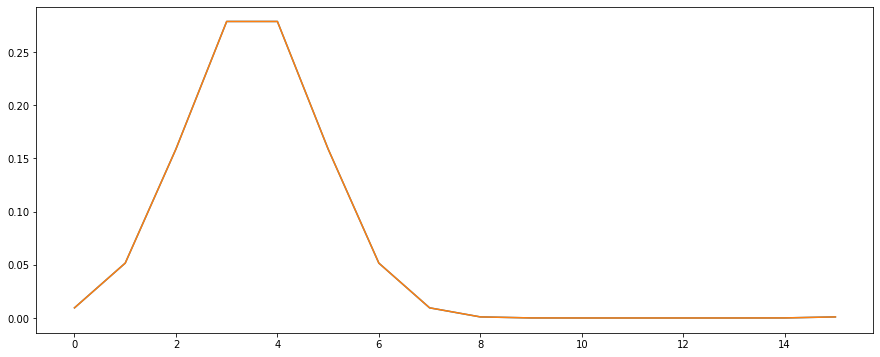


L1 distance: 5.3875230578546716e-05


In [11]:
qasm4_shifted_to_025 = """
OPENQASM 2.0;
include "qelib1.inc";
qreg q[4];
ry (-0.089758567512035) q[0];
ry (2.086244821548462) q[1];
ry (1.570813059806824) q[2];
ry (0.022182930260897) q[3];
cx q[0], q[1];
ry (-0.672245502471924) q[1];
cx q[0], q[2];
cx q[0], q[3];
ry (2.441593170166016) q[0];
cx q[1], q[0];
ry (0.335512280464172) q[0];
cx q[2], q[0];
cx q[0], q[1];
"""
analyze_qasm(4, qasm4_shifted_to_025, 12, 0.25)

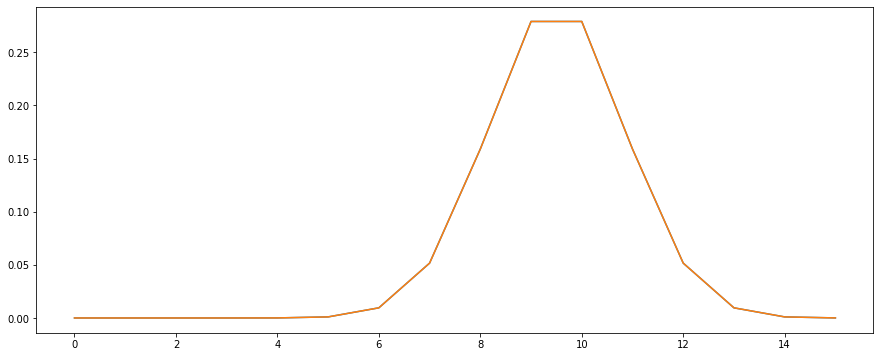


L1 distance: 2.941764647426497e-05


In [12]:
qasm4_shifted_to_0625 = """
OPENQASM 2.0;
include "qelib1.inc";
qreg q[4];
ry (-1.223162055015564) q[0];
ry (-1.148891210556030) q[1];
ry (0.987702250480652) q[2];
ry (1.570824861526489) q[3];
cx q[1], q[0];
ry (-0.339417368173599) q[0];
cx q[1], q[2];
ry (-2.478218793869019) q[1];
ry (-0.788923263549805) q[2];
cx q[2], q[0];
ry (0.124270595610142) q[0];
cx q[3], q[0];
cx q[3], q[1];
ry (0.785426855087280) q[3];
cx q[2], q[3];
ry (0.785408079624176) q[3];
"""
analyze_qasm(4, qasm4_shifted_to_0625, 12, 0.625)